In [1]:
import requests
import random
from IPython.display import Markdown, display
from PIL import Image
from io import BytesIO

**Generating a movie description...**

1. When Jade, a web-cam girl, visits Takeko's tattoo studio she becomes entranced with the image of the spider lily and with Takeko as well. In order to get closer to the object of her desire, Jade asks Takeko to give her the same lily tattoo, challenging Takeko's monastic existence and opening up memories which threaten to tear the two women apart.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

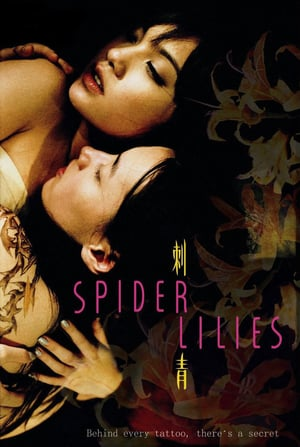

**Title:** Spider Lilies

**Genres:** Drama, Romance

**Release Date (year-month-date):** 2007-03-30

**Cast Members:** Rainie Yang, Isabella Leong, Shen Jian-Hung, Jay Shih, Kris Shie, Li Hsiu, Michio Hayashida, Ivy Chen, Pai Chih-Ying, Wong Chui-Yee, Cheng Yu-Chieh

**Number of votes:** 16

**Average Rating (Based on user votes, out of 10):** 6.8

**Description:** When Jade, a web-cam girl, visits Takeko's tattoo studio she becomes entranced with the image of the spider lily and with Takeko as well. In order to get closer to the object of her desire, Jade asks Takeko to give her the same lily tattoo, challenging Takeko's monastic existence and opening up memories which threaten to tear the two women apart.

Would you like to generate more movies? Please type yes or no: yes


**Generating a movie description...**

2. An old bitter miser who makes excuses for his uncaring nature learns real compassion when three ghosts visit him on Christmas Eve.

Does this movie sound interesting to you? Please type yes or no: no


**Generating a movie description...**

3. Having fathered an illegitimate child with his lover, Marie, feckless soldier Franz Woyzeck takes odd jobs around his small town to provide some extra money for them. One of them is volunteering for experiments conducted by a local doctor, who puts Woyzeck on a diet of peas. This serves to drive him close to madness, and the discovery that Marie is involved in an affair with the local drum major exacerbates the situation. Pushed too far, Woyzeck resorts to violence.

Does this movie sound interesting to you? Please type yes or no: no


**Generating a movie description...**

4. Eunjin who is a living legend among the gangsters dominates the male-centered underworld wielding only a pair of her trademark blades. One day, Eun-jin finds her sister from whom she was separated at an orphanage during childhood, and her sister tells Eun-jin that her last dying wish is to see that Eun-jin gets married.

Does this movie sound interesting to you? Please type yes or no: no


**Generating a movie description...**

5. Alex is going through a midlife crisis and it has become a very difficult time for him. His marriage is struggling, he's worried about his son, and his job of killing people for his family has become the most stressful part of his life. He seeks the help of a therapist and meets a woman in the waiting room that he connects with.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

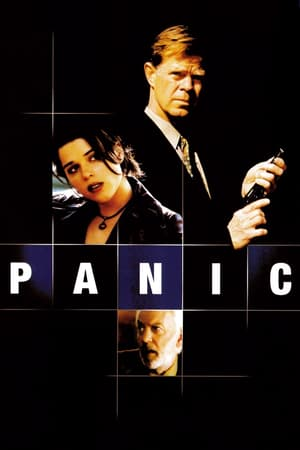

**Title:** Panic

**Genres:** Comedy, Crime, Drama

**Release Date (year-month-date):** 2000-12-01

**Cast Members:** William H. Macy, John Ritter, Neve Campbell, Donald Sutherland, Tracey Ullman, Barbara Bain, David Dorfman, Tina Lifford, Nicholle Tom, Greg Pitts, Miguel Sandoval, Stewart J. Zully

**Number of votes:** 45

**Average Rating (Based on user votes, out of 10):** 6.7

**Description:** Alex is going through a midlife crisis and it has become a very difficult time for him. His marriage is struggling, he's worried about his son, and his job of killing people for his family has become the most stressful part of his life. He seeks the help of a therapist and meets a woman in the waiting room that he connects with.

Would you like to generate more movies? Please type yes or no: yes


**Generating a movie description...**

6. Sharon Stone plays a street-wise, middle-aged moll standing up against the mobs, all of which is complicated by a 6 year old urchin with a will of his own who she reluctantly takes under her wing after his family has been gunned down.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

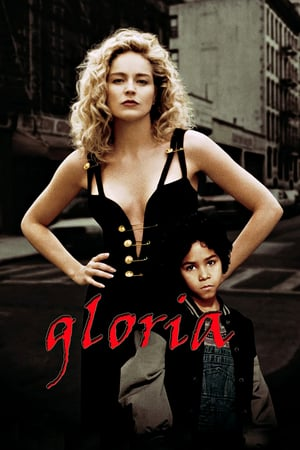

**Title:** Gloria

**Genres:** Drama, Action, Thriller, Crime

**Release Date (year-month-date):** 1999-01-22

**Cast Members:** Sharon Stone, Jeremy Northam, Cathy Moriarty, Jean-Luke Figueroa, Mike Starr, George C. Scott, Bobby Cannavale, Bonnie Bedelia, Barry McEvoy, Sarita Choudhury, Miriam Colón, Desiree Casado

**Number of votes:** 37

**Average Rating (Based on user votes, out of 10):** 5.5

**Description:** Sharon Stone plays a street-wise, middle-aged moll standing up against the mobs, all of which is complicated by a 6 year old urchin with a will of his own who she reluctantly takes under her wing after his family has been gunned down.

Would you like to generate more movies? Please type yes or no: adhs
Invalid input. Please type yes or no: 
Would you like to generate more movies? Please type yes or no: no
Would you like to get similar movie titles to: Gloria? Please type yes or no: adj
Invalid input. Please type yes or no: 
Would you like to get similar movie titles to: Gloria? Please type yes or no: yes


**Getting similar movie titles...**

A Smile Like Yours, Serial Killer, Row Your Boat, Tattooed Flower Vase, You & Me, The Forbidden Dance, Roommates, Prehysteria! 3, The Phoenix and the Magic Carpet, Prehysteria! 2, Safety Patrol, Nobody Knows Anything!, The Sisters, Getting Away with Murder, Break Night, Butterfly Caught, The Incantation, Lunatics: A Love Story, Nightwish, Used People


In [147]:
page_number = 0
overview_length = 0
movies = 0
count = 1

def printbold(string):
    display(Markdown(string))
    
def moviegenerator():
    amount_of_movies = []
    while(len(amount_of_movies)-1<0):
        global page_number
        page_number = str(random.randint(0,991))
        api_key = 'ed49669e2301eefe165a22a0551c3496'
        response = requests.get('https://api.themoviedb.org/3/movie/popular?api_key=' +  api_key + '&language=en-US&page=' + page_number)
        global movies
        movies = response.json()
        try:
            for i in range(0,len(movies['results'])):
                amount_of_movies.append(movies['results'][i].get('title'))
        except KeyError: 'results'
    if(len(amount_of_movies)!=0):
        global overview_length
        overview_length = random.randint(0,len(amount_of_movies)-1)

def getOverview():
    return str(movies['results'][overview_length].get('overview'))

def getTitle():
    return movies['results'][overview_length].get('title')

def getReleasedate():
    return movies['results'][overview_length].get('release_date')

def getAverageRating():
    return str(movies['results'][overview_length].get('vote_average'))

def getVoteCount():
    return str(movies['results'][overview_length].get('vote_count'))

def getGenre():
    genres = []
    all_genres = []
    genre_names = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    our_movie_genre_ids =  movies['results'][overview_length].get('genre_ids')
    genre_response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' +  api_key + '&language=en-US')
    genre = genre_response.json()
    for i in range(0,len(genre['genres'])):
        all_genres.append(genre['genres'][i].get('id'))
        genre_names.append(genre['genres'][i].get('name'))

    for i in range(0,len(our_movie_genre_ids)):
        for j in range(0,len(all_genres)):
            if our_movie_genre_ids[i] == all_genres[j]:
                genres.append(genre_names[j])
    return (', '.join(genres))

def getPosterpath():
    return movies['results'][overview_length].get('poster_path')

def getMoviePoster():
    poster_url = ('https://image.tmdb.org/t/p/w300/' + getPosterpath())
    response = requests.get(poster_url)
    img = Image.open(BytesIO(response.content))
    return img

def getId():
    return movies['results'][overview_length].get('id')

def getCast():
    all_cast = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    cast_url = ('https://api.themoviedb.org/3/movie/'+ str(getId()) + '/credits?api_key=' + api_key)
    response = requests.get(cast_url)
    cast_members = response.json()
    for i in range(0,len(cast_members['cast'])):
        all_cast.append(cast_members['cast'][i].get('name'))
    return (', '.join(all_cast))

def getSimilarMovies():
    similar_movies = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(getId()) + '/recommendations?api_key=' + api_key + '&language=en-US&page=1')
    recommended_movies = response.json()
    for i in range(0,len(recommended_movies['results'])):
        if recommended_movies['results'] == '[]':
            print("No similar movies found for " + getTitle())
        else:
            similar_movies.append(recommended_movies['results'][i].get('title'))
    return similar_movies

def wantSimilarMovies():
    similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()
    while True:
        if similar_movies_input == 'yes':
            printbold("**Getting similar movie titles...**")
            print(*getSimilarMovies(), sep=', ')
            break
        elif similar_movies_input == 'no':
            print("Hope you enjoy watching " + getTitle() + '!')
            break
        else:
            print('Invalid input. Please type yes or no: ')
            similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()

def getEverything():
    stop = True
    global count
    while stop:
        getMovie()
        user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()

        while True:
            if user_input == 'yes':
                getMovieDetails()
                more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()
                while True:
                    if more_movies_input == 'yes':
                        count = count + 1
                        getEverything()
                        break
                    elif more_movies_input == 'no':
                        wantSimilarMovies()
                        break
                    else:
                        print("Invalid input. Please type yes or no: ")
                        more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()
                stop = False
                break
            elif user_input == 'no':
                count = count + 1
                break
            else:
                print("Invalid input. Please type yes or no: ")
                user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
            
def getMovieDetails():
    printbold('**Retrieving movie details...**')
    display(getMoviePoster())
    printbold("**Title:**" + ' ' + getTitle())
    printbold("**Genres:**" + ' ' + getGenre())
    printbold("**Release Date (year-month-date):**" + ' ' + getReleasedate())
    printbold("**Cast Members:**" + ' ' + getCast())
    printbold("**Number of votes:**" + ' ' + getVoteCount())
    printbold("**Average Rating (Based on user votes, out of 10):**" + ' ' + getAverageRating())
    printbold("**Description:**" + ' ' + getOverview())

def getMovie():
    moviegenerator()
    while getOverview() == '':
        moviegenerator()
    printbold('**Generating a movie description...**')
    print(str(count) + '.', getOverview() + '\n')
            
#main function
stop = True
while stop:
    getMovie()
    user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
    
    while True:
        if user_input == 'yes':
            getMovieDetails()
            more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()
            while True:
                if more_movies_input == 'yes':
                    count = count + 1
                    getEverything()
                    break
                elif more_movies_input == 'no':
                    wantSimilarMovies()
                    break
                else:
                    print("Invalid input. Please type yes or no: ")
                    more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()
            stop = False
            break
        elif user_input == 'no':
            count = count + 1
            break
        else:
            print("Invalid input. Please type yes or no: ")
            user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()